<a href="https://colab.research.google.com/github/Dianamarlen12/Extraccion-de-conocimientos-de-bases-de-datos/blob/main/Preparaci%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

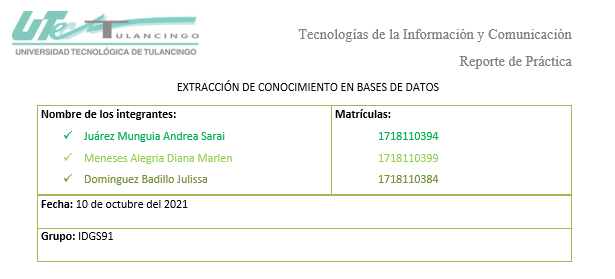

# **Introducción**
Este conjunto de datos tiene datos de clientes que compran ropa en línea. La tienda ofrece sesiones de consejos de estilo y ropa en la tienda. Los clientes entran a la tienda, tienen sesiones / reuniones con un estilista personal, luego pueden ir a casa y ordenar en una aplicación móvil o sitio web la ropa que desean.

La compañía está tratando de decidir si enfocar sus esfuerzos en su experiencia con la aplicación móvil o en su sitio web.

# **Importación de librerias**


In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Recuperar los datos**
Trabajaremos con el archivo csv de clientes de comercio electrónico de la compañía. Tiene información del
Cliente, como Correo electrónico, Dirección y su color Avatar. También tiene columnas de valores numéricos:
* Avg. Session Length: Promedio de asesoramiento de estilo en la tienda.
* Time on App: Tiempo promedio dedicado a la aplicación en minutos.
* Time on Website: Tiempo promedio dedicado al sitio web en minutos.
* Length of Membership: Cuántos años el cliente ha sido miembro.



In [ ]:
from google.colab import files
files.upload()

Saving ecommerce_customers.csv to ecommerce_customers.csv


{'ecommerce_customers.csv': b'Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent\r\nmstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49726773,12.65565115,39.57766802,4.082620633,587.951054\r\nhduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.92627203,11.10946073,37.26895887,2.664034182,392.2049334\r\npallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, DC 99414-7564",Bisque,33.00091476,11.33027806,37.11059744,4.104543202,487.5475049\r\nriverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30555663,13.71751367,36.72128268,3.120178783,581.852344\r\nmstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 37242-1057",MediumAquaMarine,33.33067252,12.79518855,37.5366533,4.446308318,599.406092\r\nalvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 67218-7250",FloralWhite,33.87103788,12.0269

In [ ]:
clientes = pd.read_csv('ecommerce_customers.csv')


In [ ]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
clientes.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,499.000000,499.000000,500.000000
mean,33.053194,12.052488,37.059788,3.535567,499.314038
std,0.992563,0.994216,1.011396,0.999169,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.346012,2.933598,445.038277
50%,33.082008,11.983231,37.067090,3.535088,498.887875
75%,33.711985,12.753850,37.716878,4.127420,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       499 non-null    float64
 6   Length of Membership  499 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# **Análsis de Datos Exploratorios**

Gráfica conjunta para comparar las columnas Time on Website y Yearly
Amount Spent.


In [ ]:
from scipy.stats import pearsonr

*Time Website*

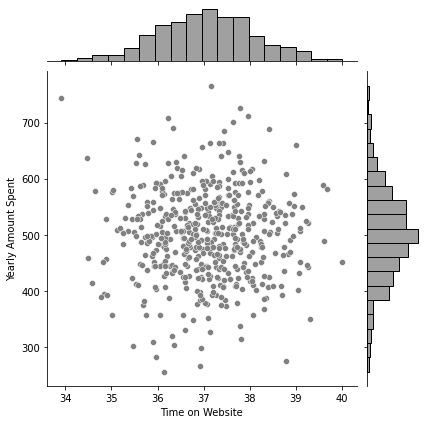

In [ ]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=clientes, color='gray')


*Time App*

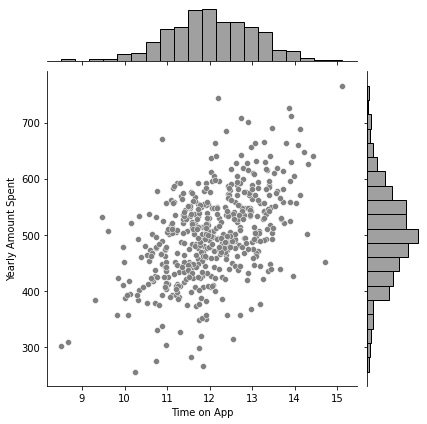

In [ ]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=clientes, color='gray')

Se uso jointplot para crear un gráfico 2D hex bin comparando Time on App y Length of Membership.

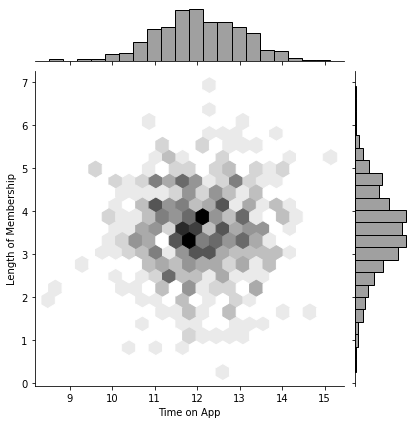

In [ ]:
sns.jointplot(x="Time on App", y="Length of Membership", data=clientes, kind="hex", color="gray")

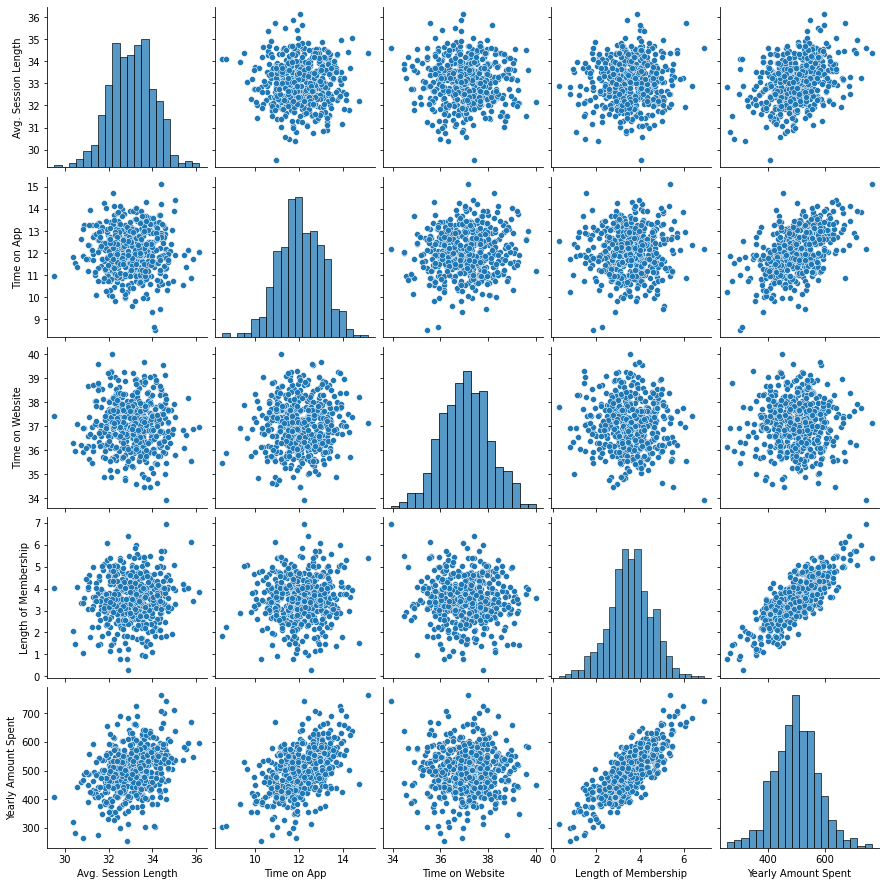

In [ ]:
sns.pairplot(clientes)

*La característica más relacionada parece ser Lenght of Membership (años de membresía) pues
dispersa.*

*Diagrama de modelo lineal de Yearly Amount Spent vs. Length of
Membership.*

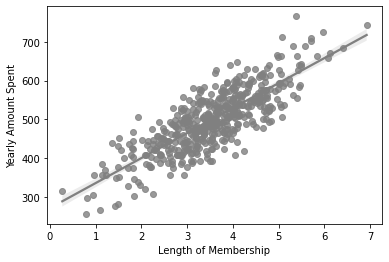

In [ ]:
sns.regplot(x="Length of Membership", y="Yearly Amount Spent", data=clientes,color='gray')


# **Datos de entrenamiento y prueba**
Se establece una variable X igual a las características numéricas de los clientes y
una variable y igual a la columna "Cantidad gastada anual".

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       499 non-null    float64
 6   Length of Membership  499 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
X = clientes[['Avg. Session Length', 'Time on App', 'Time on Website',
'Length of Membership']]

In [ ]:
y = clientes['Yearly Amount Spent']

*Se usa el model_selection.train_test_split de sklearn para dividir los datos en el conjunto de entrenamiento y
prueba. Establezca test_size=0.3 y random_state=101*

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **Entrenamiento del modelo**

In [ ]:
from sklearn.linear_model import LinearRegression

Se creo una instancia del modelo LinearRegression() llamado lm.

In [ ]:
lm = LinearRegression()

*Se ajustar lm con los datos de entrenamiento.*

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Se imprime los coeficientes del modelo*

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coeff_df

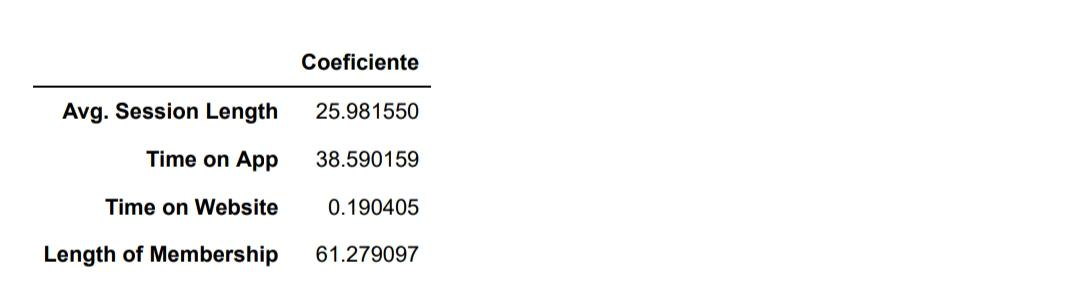

# **Predicción con los datos de prueba**

Se evaluo su rendimiento prediciendo los valores de prueba

In [ ]:
predictions = lm.predict(X_test)
predictions

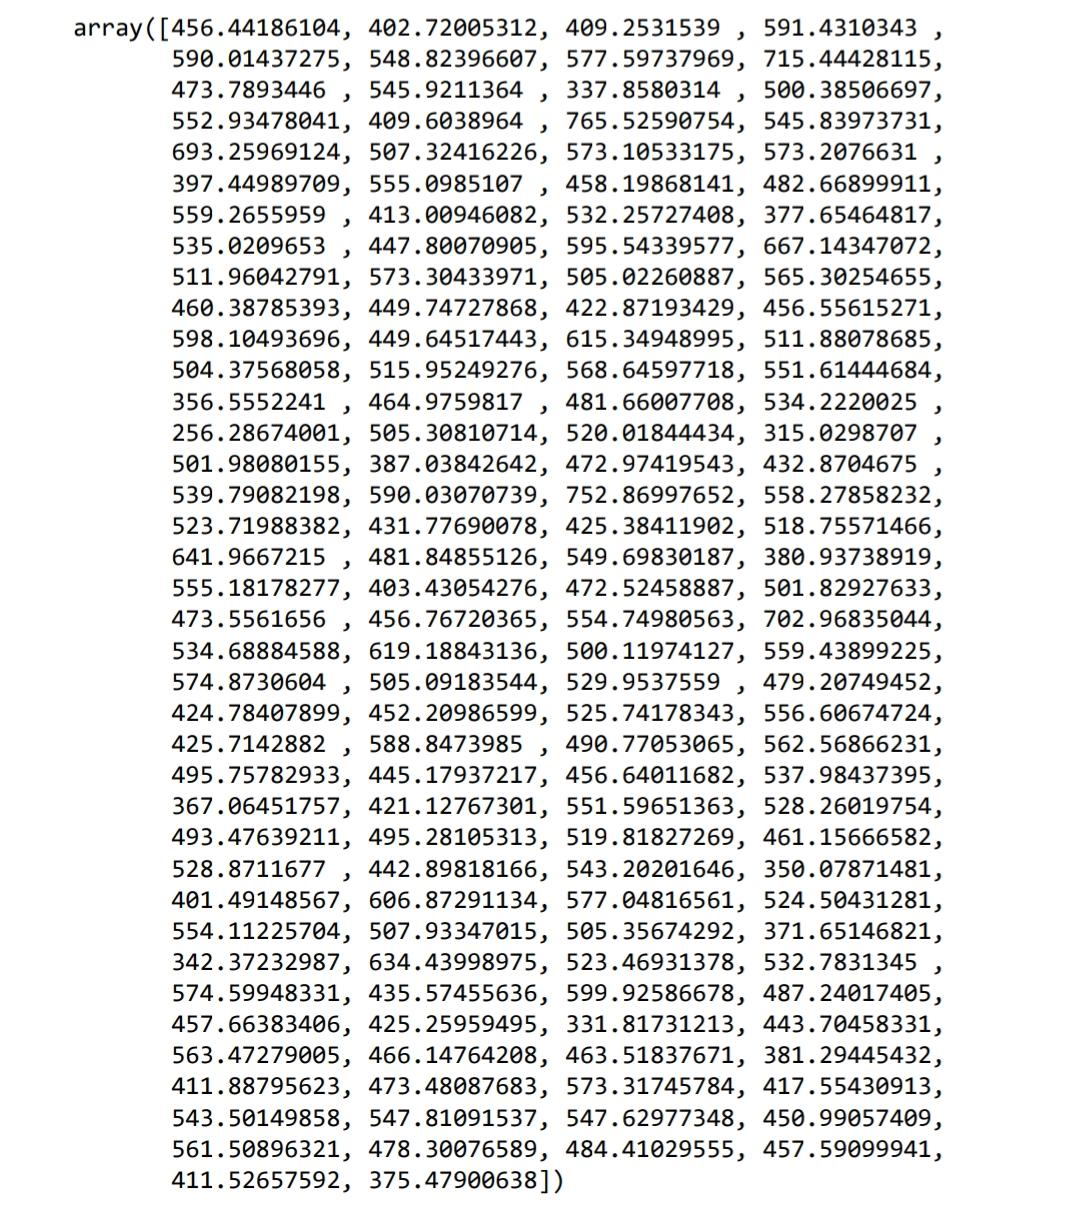

In [ ]:
plt.scatter(y_test,predictions)

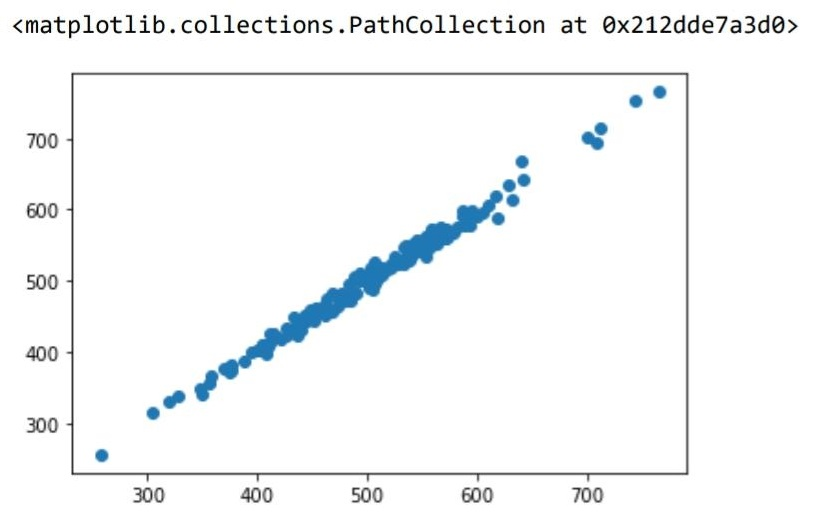

# **Evaluación del modelo**

Evaluemos el rendimiento de nuestro modelo calculando la suma residual de cuadrados y la puntuación de varianza explicada (R ^ 2).

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


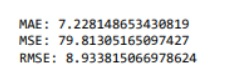

# **Residuales**

Se explora rápidamente los residuos para asegurarnos de que todo esté bien con nuestros datos.

In [ ]:
sns.distplot((y_test-predictions),bins=50);

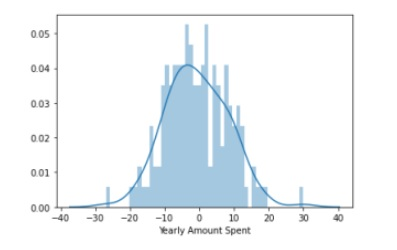

*Se sacan los coeficientes*

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coeff_df

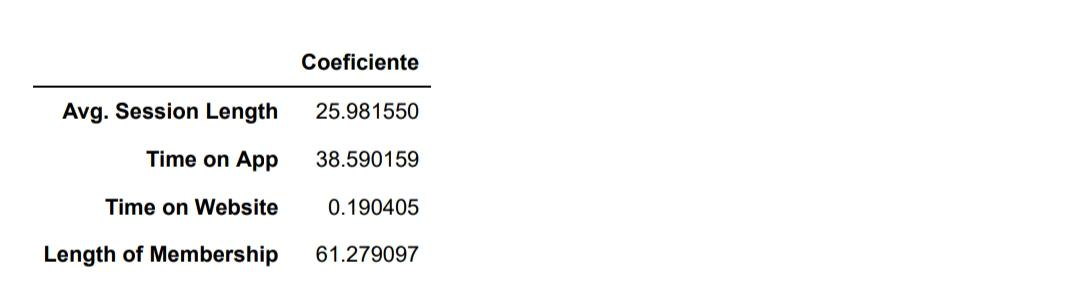

# **Conclusión**

Con base en su análisis, **¿Dónde debe invertir la empresa, en la aplicación móvil o en el sitio web?**

De acuerdo al análisis elaborado en la actividad llegamos a la conclusión de que la empresa debe de invertir más en la aplicación web ya que sacando los coeficientes de la aplicación móvil y del sitio web, la aplicación nos da más ventajas de acuerdo a los datos que obtuvimos, entonces para la empresa es mejor que siga invirtiendo en la app. Para poder llegar a esta conclusión, nos dimos cuenta que una de las partes importantes fue saber cual era el tiempo de membresía para que así nosotras pudiéramos saber sobre los coeficientes.

Sin embargo hay dos caminos, invertir en la aplicación para poder desarrollarla más; que es lo que ha funcionado hasta ahora. O invertir en el sitio web para poder ponerlo al día con la aplicación.

